<a href="https://colab.research.google.com/github/Yuji-ONUKI/GCI2020_Winter/blob/main/July08_1400_0_76278.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

print('Importing data...')
# Google Colaboratoryで作業する場合はこちらも実行してください。
from google.colab import drive
drive.mount('/content/drive')
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
data = pd.read_csv("/content/drive/MyDrive/GCI/02.（公開）コンペ2-20220621T094535Z-001.zip (Unzipped Files)/02.（公開）コンペ2/input/train.csv")
test = pd.read_csv("/content/drive/MyDrive/GCI/02.（公開）コンペ2-20220621T094535Z-001.zip (Unzipped Files)/02.（公開）コンペ2/input/test.csv")

Importing data...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
data['FLAG_NOT_EMPLOYED']=0
data.loc[data['DAYS_EMPLOYED']==365243,'FLAG_NOT_EMPLOYED']=1
#data.loc[data['DAYS_EMPLOYED']==365243,'DAYS_EMPLOYED']=np.NAN
test['FLAG_NOT_EMPLOYED']=0
test.loc[test['DAYS_EMPLOYED']==365243,'FLAG_NOT_EMPLOYED']=1
#test.loc[test['DAYS_EMPLOYED']==365243,'DAYS_EMPLOYED']=np.NAN

In [117]:
cols =list(test.columns)
cols

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHA

In [118]:
data['DAYS_BIRTH']=data['DAYS_BIRTH'] * (-1)
test['DAYS_BIRTH']=test['DAYS_BIRTH'] * (-1)

data['YEARS_BIRTH']=round(data['DAYS_BIRTH']/365.25)
test['YEARS_BIRTH']=round(test['DAYS_BIRTH']/365.25)

data['MONTHS_BIRTH']=round(data['DAYS_BIRTH']/30.4375)
test['MONTHS_BIRTH']=round(test['DAYS_BIRTH']/30.4375)

data['DAYS_ID_PUBLISH']=data['DAYS_ID_PUBLISH']*(-1)
test['DAYS_ID_PUBLISH']=test['DAYS_ID_PUBLISH']*(-1)

data['YEARS_ID_PUBLISH']=round(data['DAYS_ID_PUBLISH']/365.25)
test['YEARS_ID_PUBLISH']=round(test['DAYS_ID_PUBLISH']/365.25)

data['DAYS_REGISTRATION']=data['DAYS_REGISTRATION']*(-1)
test['DAYS_REGISTRATION']=test['DAYS_REGISTRATION']*(-1)

data['YEARS_REGISTRATION']=round(data['DAYS_REGISTRATION']/365.25)
test['YEARS_REGISTRATION']=round(test['DAYS_REGISTRATION']/365.25)

data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED']*(-1)
test['DAYS_EMPLOYED']=test['DAYS_EMPLOYED']*(-1)

data['YEARS_EMPLOYED']=round(data['DAYS_EMPLOYED']/365.25)
test['YEARS_EMPLOYED']=round(test['DAYS_EMPLOYED']/365.25)

In [119]:
dict={}
for item in data['AMT_INCOME_TOTAL'].unique():
  dict[item]=data.loc[data['AMT_INCOME_TOTAL']==item,'SK_ID_CURR'].count()
df = pd.DataFrame.from_dict(dict,orient='index')

items = list(df[df[0]>10])

In [120]:
data['AMT_INCOME_TOTAL_2']=np.NAN
test['AMT_INCOME_TOTAL_2']=np.NAN
for item in items:
  data.loc[data['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL_2']=data.loc[data['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL']
  test.loc[test['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL_2']=test.loc[test['AMT_INCOME_TOTAL']==item,'AMT_INCOME_TOTAL']

data=pd.get_dummies(data,columns=['AMT_INCOME_TOTAL_2'])
test=pd.get_dummies(test,columns={'AMT_INCOME_TOTAL_2'})

In [121]:
data.loc[data['REGION_POPULATION_RELATIVE']>0.04,'REGION_POPULATION_RELATIVE'].unique()

array([0.072508, 0.04622 ])

In [122]:
data['REGION_POPULATION_RELATIVE_0.04622']=0
data['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE_0.04622']=1
data['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE']=np.nan

test['REGION_POPULATION_RELATIVE_0.04622']=0
test['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE_0.04622']=1
test['REGION_POPULATION_RELATIVE'==0.4622,'REGION_POPULATION_RELATIVE']=np.nan

data['REGION_POPULATION_RELATIVE_0.072508']=0
data['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE_0.072508']=1
data['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE']=np.nan

test['REGION_POPULATION_RELATIVE_0.072508']=0
test['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE_0.072508']=1
test['REGION_POPULATION_RELATIVE'==0.072508,'REGION_POPULATION_RELATIVE']=np.nan

In [123]:
data['OWN_CAR_AGE_64']=0
data['OWN_CAR_AGE'==64,'OWN_CAR_AGE_64']=1
data['OWN_CAR_AGE'==64,'OWN_CAR_AGE']=np.nan

test['OWN_CAR_AGE_64']=0
test['OWN_CAR_AGE'==64,'OWN_CAR_AGE_64']=1
test['OWN_CAR_AGE'==64,'OWN_CAR_AGE']=np.nan

data['OWN_CAR_AGE_65']=0
data['OWN_CAR_AGE'==65,'OWN_CAR_AGE_65']=1
data['OWN_CAR_AGE'==65,'OWN_CAR_AGE']=np.nan

test['OWN_CAR_AGE_65']=0
test['OWN_CAR_AGE'==65,'OWN_CAR_AGE_65']=1
test['OWN_CAR_AGE'==65,'OWN_CAR_AGE']=np.nan

In [124]:
data['LOW_DEFAULT_ORG']=0
data.loc[data['ORGANIZATION_TYPE']=='Industry: type 12','LOW_DEFAULT_ORG' ]=1
data.loc[data['ORGANIZATION_TYPE']=='Trade: type 4','LOW_DEFAULT_ORG' ]=1
test['LOW_DEFAULT_ORG']=0
test.loc[test['ORGANIZATION_TYPE']=='Industry: type 12','LOW_DEFAULT_ORG' ]=1
test.loc[test['ORGANIZATION_TYPE']=='Trade: type 4','LOW_DEFAULT_ORG' ]=1

data['HIGH_DEFAULT_ORG']=0
data.loc[data['ORGANIZATION_TYPE']=='Transport: type 3','HIGH_DEFAULT_ORG']=1
test['HIGH_DEFAULT_ORG']=0
test.loc[test['ORGANIZATION_TYPE']=='Transport: type 3','HIGH_DEFAULT_ORG']=1

In [125]:
data['CREDIT_TERM'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
test['CREDIT_TERM'] = test['AMT_CREDIT'] / test['AMT_ANNUITY']

data['CREDIT_REPAY'] = data['CREDIT_TERM'] + data['MONTHS_BIRTH']
test['CREDIT_REPAY'] = test['CREDIT_TERM']  + test['MONTHS_BIRTH']

In [126]:
data['CREDIT_TO_GOODS_RATIO'] = data['AMT_CREDIT'] / data['AMT_GOODS_PRICE']
test['CREDIT_TO_GOODS_RATIO'] = test['AMT_CREDIT'] / test['AMT_GOODS_PRICE']

In [127]:
# 欠測値であれば'_NAN'を加えたカラムを作る
def flag_isNan(column_target):
  if type(column_target)==str:
    data[column_target+'_NAN']=0
    test[column_target+'_NAN']=0
    #
    data.loc[data[column_target].isna(),column_target+'_NAN']=1
    test.loc[test[column_target].isna(),column_target+'_NAN']=1

In [128]:
list(test.dtypes[data.dtypes=='float'].keys())

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEARS_BIRTH',
 'MONTHS_BIRTH',
 'YEARS_ID_PUBLISH',
 'YEARS_REGISTRATION',
 'YEARS_EMPLOYED',
 (False, 'REGION_POPULATION_RELATIVE'),
 (False, 'OWN_CAR_AGE'),
 'CREDIT_TERM',
 'CREDIT_REPAY',
 'CREDIT_TO_GOODS_RATIO']

In [129]:
for col in ['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEARS_BIRTH',
 'YEARS_ID_PUBLISH',
 'YEARS_REGISTRATION',
 'YEARS_EMPLOYED',
 #(False, 'REGION_POPULATION_RELATIVE'),
 #(False, 'OWN_CAR_AGE')
 ]:
  if (test.loc[test[col].isna(),'SK_ID_CURR'].count()>0):
    flag_isNan(col)

In [130]:
#for col in list(test.dtypes[data.dtypes!='float'].keys()):
#  if (test.loc[test[col].isna(),'SK_ID_CURR'].count()>0):
#    flag_isNan(col)

In [131]:
data['RT_CREDIT']=data['AMT_CREDIT']/data['AMT_INCOME_TOTAL']
test['RT_CREDIT']=test['AMT_CREDIT']/test['AMT_INCOME_TOTAL']

#data['FLAG_RT_CREDIT_OVER1']=0
#test['FLAG_RT_CREDIT_OVER1']=0
#data.loc[data['RT_CREDIT']>1,'FLAG_RT_CREDIT_OVER1']=1
#test.loc[data['RT_CREDIT']>1,'FLAG_RT_CREDIT_OVER1']=1

In [132]:
data['ROUND_RT_CREDIT']=round(data['RT_CREDIT'])
data['ROUND_RT_CREDIT'].fillna(0,inplace=True)
data.loc[data['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
data['ROUND_RT_CREDIT']=data['ROUND_RT_CREDIT'].astype(str)

data=pd.get_dummies(data,columns=['ROUND_RT_CREDIT'])

test['ROUND_RT_CREDIT']=round(test['RT_CREDIT'])
test['ROUND_RT_CREDIT'].fillna(0,inplace=True)
test.loc[test['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
test['ROUND_RT_CREDIT']=test['ROUND_RT_CREDIT'].astype(str)

test=pd.get_dummies(test,columns=['ROUND_RT_CREDIT'])

In [133]:
data['AGE_EMP']=data['YEARS_BIRTH']-data['YEARS_EMPLOYED']
test['AGE_EMP']=test['YEARS_BIRTH']-test['YEARS_EMPLOYED']

# 26歳までの上昇局面とそれ以降の下降局面を別のカラムにする
data['AGE_EMP1']=np.NAN
test['AGE_EMP1']=np.NAN
data.loc[data['AGE_EMP']>26,'AGE_EMP1']=data['AGE_EMP']
test.loc[test['AGE_EMP']>26,'AGE_EMP1']=test['AGE_EMP']
data.loc[data['AGE_EMP']>26,'AGE_EMP']=np.NAN
test.loc[test['AGE_EMP']>26,'AGE_EMP']=np.NAN

In [134]:
#data['TMP_FLAG_OWN_REALTY']=data['FLAG_OWN_REALTY']
#data.loc[data['TMP_FLAG_OWN_REALTY'].isna(),'TMP_FLAG_OWN_REALTY']='O'
#data['ROUND_AMT_INCOME_TOTAL']=round(data['AMT_INCOME_TOTAL']/100000)
#data.loc[data['ROUND_AMT_INCOME_TOTAL']>6,'ROUND_AMT_INCOME_TOTAL']=6
#data['ROUND_AMT_INCOME_TOTAL']=data['ROUND_AMT_INCOME_TOTAL'].astype(str)
#data['ROUND_RT_CREDIT']=round(data['RT_CREDIT'])
#data.loc[data['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
#data['ROUND_RT_CREDIT'].fillna(0,inplace=True)
#data['ROUND_RT_CREDIT']=data['ROUND_RT_CREDIT'].astype(str)
#data['REALTY_INCOME_CREDIT']=data['TMP_FLAG_OWN_REALTY']+data['ROUND_AMT_INCOME_TOTAL']+data['ROUND_RT_CREDIT']
#data.drop(['TMP_FLAG_OWN_REALTY'], axis=1, inplace=True)
#data.drop(['ROUND_AMT_INCOME_TOTAL'], axis=1, inplace=True)
#data.drop(['ROUND_RT_CREDIT'], axis=1, inplace=True)

#test['TMP_FLAG_OWN_REALTY']=test['FLAG_OWN_REALTY']
#test.loc[test['TMP_FLAG_OWN_REALTY'].isna(),'TMP_FLAG_OWN_REALTY']='O'
#test['ROUND_AMT_INCOME_TOTAL']=round(test['AMT_INCOME_TOTAL']/100000)
#test['ROUND_AMT_INCOME_TOTAL'].fillna(0,inplace=True)
#test.loc[test['ROUND_AMT_INCOME_TOTAL']>6,'ROUND_AMT_INCOME_TOTAL']=6
#test['ROUND_AMT_INCOME_TOTAL']=test['ROUND_AMT_INCOME_TOTAL'].astype(str)
#test['ROUND_RT_CREDIT']=round(test['RT_CREDIT'])
#test.loc[test['ROUND_RT_CREDIT']>6,'ROUND_RT_CREDIT']=6
#test['ROUND_RT_CREDIT'].fillna(0,inplace=True)
#test['ROUND_RT_CREDIT']=test['ROUND_RT_CREDIT'].astype(str)
#test['REALTY_INCOME_CREDIT']=test['TMP_FLAG_OWN_REALTY']+test['ROUND_AMT_INCOME_TOTAL']+test['ROUND_RT_CREDIT']

In [135]:
data['ROUND_EXT_SOURCE_1']=round(data['EXT_SOURCE_1']*100)
data['ROUND_EXT_SOURCE_2']=round(data['EXT_SOURCE_2']*100)
data['ROUND_EXT_SOURCE_3']=round(data['EXT_SOURCE_3']*100)

test['ROUND_EXT_SOURCE_1']=round(test['EXT_SOURCE_1']*100)
test['ROUND_EXT_SOURCE_2']=round(test['EXT_SOURCE_2']*100)
test['ROUND_EXT_SOURCE_3']=round(test['EXT_SOURCE_3']*100)

In [136]:
t1=data.loc[data['TARGET']==1]
t0=data.loc[data['TARGET']==0]
ta=data
def addColumnOfNumber(column_target):
    column_new = 'NEW_NUM_'+column_target
    cats = ta[column_target].unique()

    dict={}
    for cat in cats:
      dict[cat]=(t1.loc[ta[column_target]==cat,'SK_ID_CURR'].count()/ta.loc[ta[column_target]==cat,'SK_ID_CURR'].count()).astype(str)

    data[column_new]=data[column_target]
    test[column_new]=test[column_target]

    data[column_new]=data[column_new].map(dict)
    test[column_new]=test[column_new].map(dict)

    data[column_new]=data[column_new].astype(float)
    test[column_new]=test[column_new].astype(float)

In [137]:
#addColumnOfNumber('REALTY_INCOME_CREDIT')
addColumnOfNumber('ROUND_EXT_SOURCE_1')
addColumnOfNumber('ROUND_EXT_SOURCE_2')
addColumnOfNumber('ROUND_EXT_SOURCE_3')
data.drop(['ROUND_EXT_SOURCE_1'],axis=1,inplace=True)
test.drop(['ROUND_EXT_SOURCE_1'],axis=1,inplace=True)
data.drop(['ROUND_EXT_SOURCE_2'],axis=1,inplace=True)
test.drop(['ROUND_EXT_SOURCE_2'],axis=1,inplace=True)
data.drop(['ROUND_EXT_SOURCE_3'],axis=1,inplace=True)
test.drop(['ROUND_EXT_SOURCE_3'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [138]:
# Create an anomalous flag column
data['DAYS_EMPLOYED_ANOM'] = data["DAYS_EMPLOYED"] == -365243

# Replace the anomalous values with nan
data['DAYS_EMPLOYED'].replace({-365243: np.nan}, inplace = True)

# Create an anomalous flag column
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == -365243

# Replace the anomalous values with nan
test['DAYS_EMPLOYED'].replace({-365243: np.nan}, inplace = True)

In [139]:
data['DAYS_LAST_PHONE_CHANGE']=data['DAYS_LAST_PHONE_CHANGE']*(-1)
test['DAYS_LAST_PHONE_CHANGE']=test['DAYS_LAST_PHONE_CHANGE']*(-1)

data['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
test['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)

data['YEARS_LAST_PHONE_CHANGE']=round(data['DAYS_LAST_PHONE_CHANGE']/365.25)
test['YEARS_LAST_PHONE_CHANGE']=round(test['DAYS_LAST_PHONE_CHANGE']/365.25)

data['MONTH_LAST_PHONE_CHANGE']=round(data['DAYS_LAST_PHONE_CHANGE']/30.475)
test['MONTH_LAST_PHONE_CHANGE']=round(test['DAYS_LAST_PHONE_CHANGE']/30.475)

In [140]:
#Separate target variable
y = data['TARGET']
del data['TARGET']

#One-hot encoding of categorical features in data and test sets
categorical_features = [col for col in data.columns if data[col].dtype == 'object']

one_hot_df = pd.concat([data,test])
one_hot_df = pd.get_dummies(one_hot_df, columns=categorical_features)

data = one_hot_df.iloc[:data.shape[0],:]
test = one_hot_df.iloc[data.shape[0]:,]



In [141]:
# Align data and test

data_labels = y

# Align the dataing and testing data, keep only columns present in both dataframes
data, test = data.align(test, join = 'inner', axis = 1)

# Add the target back in
data['TARGET'] = y

print('dataing Features shape: ', data.shape)
print('Testing Features shape: ', test.shape)

dataing Features shape:  (171202, 208)
Testing Features shape:  (61500, 207)


In [142]:
#Polynomial Features

# Make a new dataframe for polynomial features
poly_features = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'CREDIT_TERM','TARGET']]
poly_features_test = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'CREDIT_TERM']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [143]:
# data the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (171202, 56)


In [144]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH', 'CREDIT_TERM'])[:15]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'CREDIT_TERM',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_1 CREDIT_TERM',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 CREDIT_TERM']

In [145]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH', 'CREDIT_TERM']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(20))
print(poly_corrs.tail(20))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


EXT_SOURCE_2 EXT_SOURCE_3                -0.190619
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.187364
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.179790
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.174604
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.169516
EXT_SOURCE_1 EXT_SOURCE_2                -0.165062
EXT_SOURCE_2                             -0.162383
EXT_SOURCE_2 DAYS_BIRTH                  -0.159863
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.157203
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.155854
EXT_SOURCE_2 EXT_SOURCE_3 CREDIT_TERM    -0.155820
EXT_SOURCE_2^2 DAYS_BIRTH                -0.152261
EXT_SOURCE_2^2                           -0.151487
EXT_SOURCE_1 EXT_SOURCE_3                -0.150418
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH     -0.143557
EXT_SOURCE_3                             -0.142190
EXT_SOURCE_2^3                           -0.142178
EXT_SOURCE_3 DAYS_BIRTH                  -0.141401
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.138980
EXT_SOURCE_1^2 EXT_SOURCE_2    

In [146]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3','DAYS_BIRTH', 'CREDIT_TERM']))

# Merge polynomial features into dataing dataframe
poly_features['SK_ID_CURR'] = data['SK_ID_CURR']
app_train_poly = data.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test['SK_ID_CURR']
app_test_poly = test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('dataing data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


dataing data with polynomial features shape:  (171202, 263)
Testing data with polynomial features shape:   (61500, 263)


In [147]:
app_train_poly.head()

app_train_poly=app_train_poly.rename(columns={'EXT_SOURCE_1_x':'EXT_SOURCE_1','EXT_SOURCE_2_x':'EXT_SOURCE_2','EXT_SOURCE_3_x':'EXT_SOURCE_3','DAYS_BIRTH_x':'DAYS_BIRTH'})
#app_train_poly=app_train_poly.drop('1',inplace=True)

app_test_poly=app_test_poly.rename(columns={'EXT_SOURCE_1_x':'EXT_SOURCE_1','EXT_SOURCE_2_x':'EXT_SOURCE_2','EXT_SOURCE_3_x':'EXT_SOURCE_3','DAYS_BIRTH_x':'DAYS_BIRTH'})

In [148]:
app_test_poly.drop('1',axis=1,inplace=True)
app_train_poly.drop('1',axis=1,inplace=True)

In [149]:
#app_train_poly['NAME_TYPE_SUITE_Spouse, partner_x']

In [150]:
# check and remove constant columns
#colsToRemove = []
#for col in app_train_poly.columns:
#    if col != 'SK_ID_CURR' and col != 'TARGET':
#        if app_train_poly[col].std() == 0: 
#            colsToRemove.append(col)
        
# remove constant columns in the training set
#app_train_poly.drop(colsToRemove, axis=1, inplace=True)

# remove constant columns in the test set
#app_test_poly.drop(colsToRemove, axis=1, inplace=True) 

#print("Removed `{}` Constant Columns\n".format(len(colsToRemove)))
#print(colsToRemove)

In [151]:
#app_train_domain['SK_ID_CURR']

In [152]:
# create temp DF
#data1 = pd.read_csv('../input/application_train.csv')
#test1 = pd.read_csv('../input/application_test.csv')

#app_train_domain = app_test_domain.drop('SK_ID_PREV_x',axis=1)
#app_test_domain = app_test_domain.drop('SK_ID_PREV_x',axis=1)

#app_train_domain = app_test_domain.drop('SK_ID_PREV_y',axis=1)
#app_test_domain = app_test_domain.drop('SK_ID_PREV_y',axis=1)

In [153]:
#app_train_poly['AMT_CREDIT'] = data1['AMT_CREDIT']
#app_test_poly['AMT_CREDIT'] = test1['AMT_CREDIT']
#app_train_poly['AMT_GOODS_PRICE'] = data1['AMT_GOODS_PRICE']
#app_test_poly['AMT_GOODS_PRICE'] = test1['AMT_GOODS_PRICE']
app_train_poly=app_train_poly.rename(columns={'AMT_CREDIT_x':'AMT_CREDIT','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE'})
app_test_poly=app_test_poly.rename(columns={'AMT_CREDIT_x':'AMT_CREDIT','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE'})

In [154]:
app_train_domain = app_train_poly.copy()
app_test_domain = app_test_poly.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM_INV'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
app_train_domain['NEW_EXT_SOURCES_MEAN'] = app_train_domain[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
app_train_domain['NEW_EMPLOY_TO_BIRTH_RATIO'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
#
app_train_domain['NEW_EMPLOY_TO_BIRTH_NUM'] = app_train_domain['DAYS_BIRTH'] - app_train_domain['DAYS_EMPLOYED']
app_train_domain['NEW_PHONE_TO_BIRTH_NUM'] = app_train_domain['DAYS_BIRTH'] - app_train_domain['DAYS_LAST_PHONE_CHANGE']
app_train_domain['NEW_REGISTRATION_TO_BIRTH_NUM'] = app_train_domain['DAYS_BIRTH'] - app_train_domain['DAYS_REGISTRATION']
app_train_domain['NEW_ID_PUBLISH_TO_BIRTH_NUM'] = app_train_domain['DAYS_BIRTH'] - app_train_domain['DAYS_ID_PUBLISH']
app_train_domain['NEW_PHONE_TO_REGISTRATION_NUM'] = app_train_domain['DAYS_REGISTRATION'] - app_train_domain['DAYS_LAST_PHONE_CHANGE']
app_train_domain['NEW_EMPLOY_TO_REGISTRATION_NUM'] = app_train_domain['DAYS_REGISTRATION'] - app_train_domain['DAYS_EMPLOYED']
app_train_domain['NEW_ID_PUBLISH_TO_REGISTRATION_NUM'] = app_train_domain['DAYS_REGISTRATION'] - app_train_domain['DAYS_ID_PUBLISH']
app_train_domain['NEW_PHONE_TO_EMPLOY_NUM'] = app_train_domain['DAYS_EMPLOYED'] - app_train_domain['DAYS_LAST_PHONE_CHANGE']
app_train_domain['NEW_ID_PUBLISH_TO_EMPLOY_NUM'] = app_train_domain['DAYS_EMPLOYED'] - app_train_domain['DAYS_ID_PUBLISH']
app_train_domain['NEW_REGION_RATING_CLIENT_NUM'] = app_train_domain['REGION_RATING_CLIENT_W_CITY'] - app_train_domain['REGION_RATING_CLIENT']
app_train_domain['NEW_FAM_MEMBERS_NUM'] = app_train_domain['CNT_FAM_MEMBERS'] - app_train_domain['CNT_CHILDREN']
app_train_domain['NEW_EMPLOY_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_EMPLOYED']
app_train_domain['NEW_PHONE_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_LAST_PHONE_CHANGE']
app_train_domain['NEW_REGISTRATION_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_REGISTRATION']
app_train_domain['NEW_ID_PUBLISH_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['YEARS_ID_PUBLISH']
app_train_domain['NEW_OWN_CAR_TO_BIRTH_YEAR'] = app_train_domain['YEARS_BIRTH'] - app_train_domain['OWN_CAR_AGE']
app_train_domain['NEW_PHONE_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['YEARS_LAST_PHONE_CHANGE']
app_train_domain['NEW_EMPLOY_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['YEARS_EMPLOYED']
app_train_domain['NEW_ID_PUBLISH_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['YEARS_ID_PUBLISH']
app_train_domain['NEW_OWN_CAR_TO_REGISTRATION_YEAR'] = app_train_domain['YEARS_REGISTRATION'] - app_train_domain['OWN_CAR_AGE']
app_train_domain['NEW_PHONE_TO_EMPLOY_YEAR'] = app_train_domain['YEARS_EMPLOYED'] - app_train_domain['YEARS_LAST_PHONE_CHANGE']
app_train_domain['NEW_ID_PUBLISH_TO_EMPLOY_YEAR'] = app_train_domain['YEARS_EMPLOYED'] - app_train_domain['YEARS_ID_PUBLISH']
app_train_domain['NEW_OWN_CAR_TO_EMPLOY_YEAR'] = app_train_domain['YEARS_EMPLOYED'] - app_train_domain['OWN_CAR_AGE']
app_train_domain['NEW_ID_PUBLISH_TO_OWN_CAR'] = app_train_domain['OWN_CAR_AGE'] - app_train_domain['YEARS_ID_PUBLISH']

In [155]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM_INV'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

app_test_domain['NEW_EXT_SOURCES_MEAN'] = app_test_domain[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
app_test_domain['NEW_EMPLOY_TO_BIRTH_RATIO'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#
app_test_domain['NEW_EMPLOY_TO_BIRTH_NUM'] = app_test_domain['DAYS_BIRTH'] - app_test_domain['DAYS_EMPLOYED']
app_test_domain['NEW_PHONE_TO_BIRTH_NUM'] = app_test_domain['DAYS_BIRTH'] - app_test_domain['DAYS_LAST_PHONE_CHANGE']
app_test_domain['NEW_REGISTRATION_TO_BIRTH_NUM'] = app_test_domain['DAYS_BIRTH'] - app_test_domain['DAYS_REGISTRATION']
app_test_domain['NEW_ID_PUBLISH_TO_BIRTH_NUM'] = app_test_domain['DAYS_BIRTH'] - app_test_domain['DAYS_ID_PUBLISH']
app_test_domain['NEW_PHONE_TO_REGISTRATION_NUM'] = app_test_domain['DAYS_REGISTRATION'] - app_test_domain['DAYS_LAST_PHONE_CHANGE']
app_test_domain['NEW_EMPLOY_TO_REGISTRATION_NUM'] = app_test_domain['DAYS_REGISTRATION'] - app_test_domain['DAYS_EMPLOYED']
app_test_domain['NEW_ID_PUBLISH_TO_REGISTRATION_NUM'] = app_test_domain['DAYS_REGISTRATION'] - app_test_domain['DAYS_ID_PUBLISH']
app_test_domain['NEW_PHONE_TO_EMPLOY_NUM'] = app_test_domain['DAYS_EMPLOYED'] - app_test_domain['DAYS_LAST_PHONE_CHANGE']
app_test_domain['NEW_ID_PUBLISH_TO_EMPLOY_NUM'] = app_test_domain['DAYS_EMPLOYED'] - app_test_domain['DAYS_ID_PUBLISH']
app_test_domain['NEW_REGION_RATING_CLIENT_NUM'] = app_test_domain['REGION_RATING_CLIENT_W_CITY'] - app_test_domain['REGION_RATING_CLIENT']
app_test_domain['NEW_FAM_MEMBERS_NUM'] = app_test_domain['CNT_FAM_MEMBERS'] - app_test_domain['CNT_CHILDREN']
app_test_domain['NEW_EMPLOY_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_EMPLOYED']
app_test_domain['NEW_PHONE_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_LAST_PHONE_CHANGE']
app_test_domain['NEW_REGISTRATION_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_REGISTRATION']
app_test_domain['NEW_ID_PUBLISH_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['YEARS_ID_PUBLISH']
app_test_domain['NEW_OWN_CAR_TO_BIRTH_YEAR'] = app_test_domain['YEARS_BIRTH'] - app_test_domain['OWN_CAR_AGE']
app_test_domain['NEW_PHONE_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['YEARS_LAST_PHONE_CHANGE']
app_test_domain['NEW_EMPLOY_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['YEARS_EMPLOYED']
app_test_domain['NEW_ID_PUBLISH_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['YEARS_ID_PUBLISH']
app_test_domain['NEW_OWN_CAR_TO_REGISTRATION_YEAR'] = app_test_domain['YEARS_REGISTRATION'] - app_test_domain['OWN_CAR_AGE']
app_test_domain['NEW_PHONE_TO_EMPLOY_YEAR'] = app_test_domain['YEARS_EMPLOYED'] - app_test_domain['YEARS_LAST_PHONE_CHANGE']
app_test_domain['NEW_ID_PUBLISH_TO_EMPLOY_YEAR'] = app_test_domain['YEARS_EMPLOYED'] - app_test_domain['YEARS_ID_PUBLISH']
app_test_domain['NEW_OWN_CAR_TO_EMPLOY_YEAR'] = app_test_domain['YEARS_EMPLOYED'] - app_test_domain['OWN_CAR_AGE']
app_test_domain['NEW_ID_PUBLISH_TO_OWN_CAR'] = app_test_domain['OWN_CAR_AGE'] - app_test_domain['YEARS_ID_PUBLISH']

In [156]:
app_train_domain['TARGET'] = poly_target
print('Training data with polynomial features shape: ', app_train_domain.shape)
print('Testing data with polynomial features shape:  ', app_test_domain.shape)

Training data with polynomial features shape:  (171202, 293)
Testing data with polynomial features shape:   (61500, 292)


In [157]:
app_train_domain['TARGET'] = poly_target
print('Training data with polynomial features shape: ', app_train_domain.shape)
print('Testing data with polynomial features shape:  ', app_test_domain.shape)

Training data with polynomial features shape:  (171202, 293)
Testing data with polynomial features shape:   (61500, 292)


In [177]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds =5 ):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, nthread=4,objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.015, 
                                   reg_alpha = 0.041545473, reg_lambda = 0.1, 
                                   n_jobs = -1, random_state = 50,num_leaves=15,colsample_bytree=.9497036,subsample=.8715623,
                                  max_depth=5,min_split_gain=.0222415,min_child_weight=39.3259775,max_bin=200,num_boost_round=3000,min_data_in_leaf=100,bagging_fraction=0.5,bagging_freq=10)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [178]:
submission, fi, metrics = model(app_train_domain, app_test_domain)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (171202, 291)
Testing Data Shape:  (61500, 291)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.75666	train's binary_logloss: 0.589633	valid's auc: 0.748098	valid's binary_logloss: 0.589862
[400]	train's auc: 0.773004	train's binary_logloss: 0.571932	valid's auc: 0.757743	valid's binary_logloss: 0.574805
[600]	train's auc: 0.782687	train's binary_logloss: 0.561925	valid's auc: 0.760386	valid's binary_logloss: 0.56768
[800]	train's auc: 0.791424	train's binary_logloss: 0.553111	valid's auc: 0.762845	valid's binary_logloss: 0.562385
Early stopping, best iteration is:
[800]	train's auc: 0.791424	train's binary_logloss: 0.553111	valid's auc: 0.762845	valid's binary_logloss: 0.562385


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757758	train's binary_logloss: 0.589116	valid's auc: 0.748502	valid's binary_logloss: 0.592582
[400]	train's auc: 0.773528	train's binary_logloss: 0.571555	valid's auc: 0.757123	valid's binary_logloss: 0.57914
[600]	train's auc: 0.783523	train's binary_logloss: 0.561225	valid's auc: 0.759587	valid's binary_logloss: 0.573061
[800]	train's auc: 0.791344	train's binary_logloss: 0.552985	valid's auc: 0.760711	valid's binary_logloss: 0.566887
Early stopping, best iteration is:
[790]	train's auc: 0.790901	train's binary_logloss: 0.553416	valid's auc: 0.760656	valid's binary_logloss: 0.566114


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.756857	train's binary_logloss: 0.589486	valid's auc: 0.753022	valid's binary_logloss: 0.5877
[400]	train's auc: 0.773279	train's binary_logloss: 0.571632	valid's auc: 0.760379	valid's binary_logloss: 0.574041
[600]	train's auc: 0.783452	train's binary_logloss: 0.561199	valid's auc: 0.762519	valid's binary_logloss: 0.5687
[800]	train's auc: 0.792494	train's binary_logloss: 0.552134	valid's auc: 0.763317	valid's binary_logloss: 0.562471
Early stopping, best iteration is:
[858]	train's auc: 0.794655	train's binary_logloss: 0.549872	valid's auc: 0.763648	valid's binary_logloss: 0.560953


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759753	train's binary_logloss: 0.587149	valid's auc: 0.737382	valid's binary_logloss: 0.593051
[400]	train's auc: 0.77615	train's binary_logloss: 0.568986	valid's auc: 0.745187	valid's binary_logloss: 0.5789
[600]	train's auc: 0.785732	train's binary_logloss: 0.558955	valid's auc: 0.747538	valid's binary_logloss: 0.571702
[800]	train's auc: 0.794049	train's binary_logloss: 0.550407	valid's auc: 0.747864	valid's binary_logloss: 0.56725
Early stopping, best iteration is:
[811]	train's auc: 0.794457	train's binary_logloss: 0.549822	valid's auc: 0.74807	valid's binary_logloss: 0.566306


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.75999	train's binary_logloss: 0.587054	valid's auc: 0.739505	valid's binary_logloss: 0.590571
[400]	train's auc: 0.775313	train's binary_logloss: 0.569734	valid's auc: 0.747316	valid's binary_logloss: 0.57567
[600]	train's auc: 0.785292	train's binary_logloss: 0.559474	valid's auc: 0.750137	valid's binary_logloss: 0.5695
[800]	train's auc: 0.79383	train's binary_logloss: 0.550894	valid's auc: 0.752061	valid's binary_logloss: 0.565448
Early stopping, best iteration is:
[790]	train's auc: 0.793344	train's binary_logloss: 0.551381	valid's auc: 0.752144	valid's binary_logloss: 0.565133
Baseline metrics
      fold     train     valid
0        0  0.791424  0.762845
1        1  0.790901  0.760656
2        2  0.794655  0.763648
3        3  0.794457  0.748070
4        4  0.793344  0.752144
5  overall  0.792956  0.757393


*  overall  0.806886  0.757764

This is 0.76278 on Public Leader Borard

*  overall  0.808611  0.758026

*  overall  0.802443  0.757587

*  overall  0.803672  0.756758

5  overall  0.804967  0.757232

5  overall  0.792956  0.757393  Leaf=20に変更の結果

In [160]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (20, 20))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:50]))), 
            df['importance_normalized'].head(50), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:50]))))
    ax.set_yticklabels(df['feature'].head(50))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

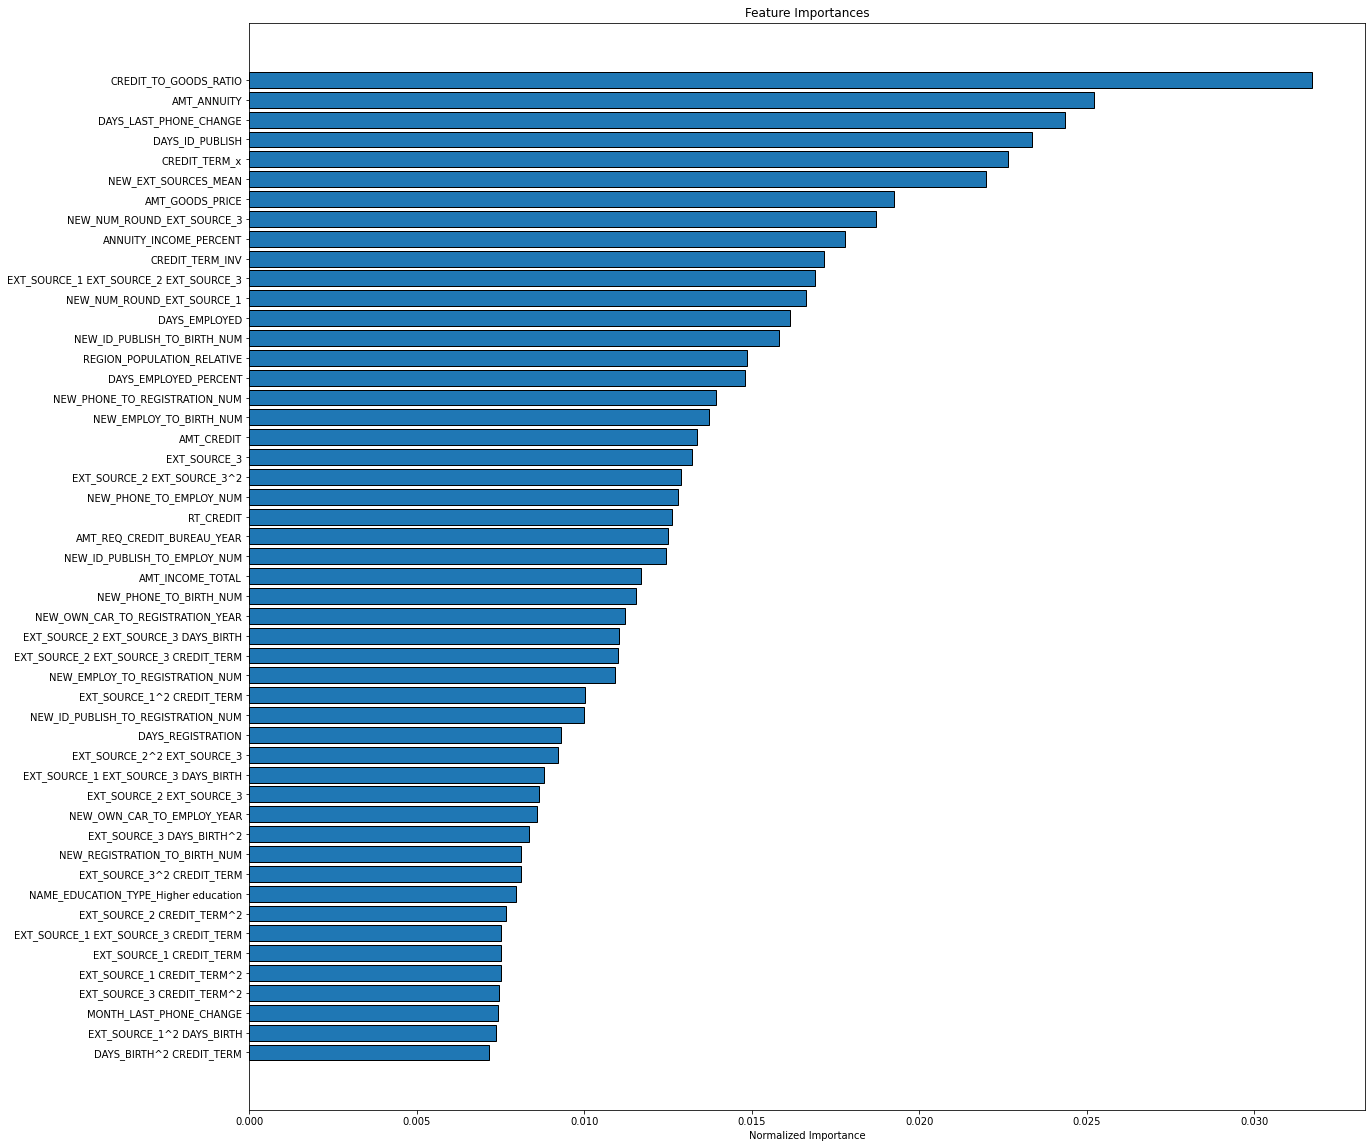

In [161]:
fi_sorted = plot_feature_importances(fi)

In [162]:
submission.to_csv('second_sub.csv', index = False)

In [163]:
app_train_domain=app_train_domain.rename(columns=lambda x: str(x).replace(u' ', u''))
app_test_domain=app_test_domain.rename(columns=lambda x: str(x).replace(u' ', u''))

In [164]:
nonZero=fi_sorted['feature'].count()-fi_sorted.loc[fi_sorted['importance_normalized']==0,'feature'].count()
metrics_dict={}
loop_from = 1
loop_to = 0
for n in range(nonZero-loop_from,nonZero-loop_to):
  feats=list(fi_sorted['feature'].iloc[0:n:1])
  feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
  feats.append('SK_ID_CURR')
  feats_test = feats.copy()
  feats.append('TARGET')  
  submission_n, fi_n, metrics_n = model(app_train_domain[feats], app_test_domain[feats_test])
#  submission_n.to_csv('/content/drive/MyDrive/submission'+str(n)+'.csv', index = False)
  submission_n.to_csv('submission'+str(n)+'.csv', index = False)
  metrics_dict[n]=metrics_n.iloc[5,2]
result=pd.DataFrame.from_dict(metrics_dict,orient='index')

Training Data Shape:  (171202, 205)
Testing Data Shape:  (61500, 205)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.76831	train's binary_logloss: 0.579757	valid's auc: 0.750903	valid's binary_logloss: 0.581222
[400]	train's auc: 0.78521	train's binary_logloss: 0.560744	valid's auc: 0.758293	valid's binary_logloss: 0.567069
[600]	train's auc: 0.796305	train's binary_logloss: 0.549312	valid's auc: 0.760603	valid's binary_logloss: 0.559146
[800]	train's auc: 0.806146	train's binary_logloss: 0.539147	valid's auc: 0.762746	valid's binary_logloss: 0.553275
Early stopping, best iteration is:
[795]	train's auc: 0.80594	train's binary_logloss: 0.539356	valid's auc: 0.762799	valid's binary_logloss: 0.553247


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.767728	train's binary_logloss: 0.580312	valid's auc: 0.749265	valid's binary_logloss: 0.584458
[400]	train's auc: 0.78449	train's binary_logloss: 0.561666	valid's auc: 0.756503	valid's binary_logloss: 0.571923
[600]	train's auc: 0.795996	train's binary_logloss: 0.549761	valid's auc: 0.758841	valid's binary_logloss: 0.565305
[800]	train's auc: 0.805008	train's binary_logloss: 0.540246	valid's auc: 0.760142	valid's binary_logloss: 0.558471
Early stopping, best iteration is:
[732]	train's auc: 0.802449	train's binary_logloss: 0.542786	valid's auc: 0.76021	valid's binary_logloss: 0.558637


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.767708	train's binary_logloss: 0.5803	valid's auc: 0.754682	valid's binary_logloss: 0.579609
[400]	train's auc: 0.785927	train's binary_logloss: 0.560304	valid's auc: 0.760394	valid's binary_logloss: 0.566131
[600]	train's auc: 0.797033	train's binary_logloss: 0.548695	valid's auc: 0.762757	valid's binary_logloss: 0.560291
[800]	train's auc: 0.807279	train's binary_logloss: 0.538175	valid's auc: 0.762722	valid's binary_logloss: 0.553545
Early stopping, best iteration is:
[760]	train's auc: 0.805033	train's binary_logloss: 0.540445	valid's auc: 0.763073	valid's binary_logloss: 0.553618


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.770335	train's binary_logloss: 0.577852	valid's auc: 0.739875	valid's binary_logloss: 0.584934
[400]	train's auc: 0.78834	train's binary_logloss: 0.557729	valid's auc: 0.746175	valid's binary_logloss: 0.570897
[600]	train's auc: 0.798567	train's binary_logloss: 0.546981	valid's auc: 0.74782	valid's binary_logloss: 0.563974
[800]	train's auc: 0.807455	train's binary_logloss: 0.537585	valid's auc: 0.748181	valid's binary_logloss: 0.558881
Early stopping, best iteration is:
[818]	train's auc: 0.808065	train's binary_logloss: 0.536672	valid's auc: 0.748487	valid's binary_logloss: 0.557124


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.770371	train's binary_logloss: 0.577954	valid's auc: 0.741184	valid's binary_logloss: 0.582535
[400]	train's auc: 0.787888	train's binary_logloss: 0.558038	valid's auc: 0.747501	valid's binary_logloss: 0.567401
[600]	train's auc: 0.798942	train's binary_logloss: 0.546627	valid's auc: 0.750108	valid's binary_logloss: 0.561037
[800]	train's auc: 0.807666	train's binary_logloss: 0.537583	valid's auc: 0.751588	valid's binary_logloss: 0.556569
Early stopping, best iteration is:
[799]	train's auc: 0.807623	train's binary_logloss: 0.537633	valid's auc: 0.751607	valid's binary_logloss: 0.556549


In [165]:
print(result)

            0
205  0.757129


205  0.757129

291  0.756978

In [166]:
#result.to_csv('/content/drive/MyDrive/result.csv',index=False)
result.to_csv('result.csv',index=False)

In [167]:
#feats=list(fi_sorted['feature'].iloc[0:189:1])
#feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
#feats.append('SK_ID_CURR')
#feats_test = feats.copy()
#feats.append('TARGET')  
#submission_189, fi_189, metrics_189 = model(app_train_domain[feats], app_test_domain[feats_test])
#submission_189.to_csv('/content/drive/MyDrive/submission189'.csv', index = False)
#metrics_n.iloc[5,2]
#fi189_sorted = plot_feature_importances(fi_189)

revolving loan のみ

In [179]:
feats=list(fi_sorted['feature'])
feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
feats.append('SK_ID_CURR')
feats_test = feats.copy()
feats.append('TARGET')  
feats.remove('NAME_CONTRACT_TYPE_Revolvingloans')
feats.remove('NAME_CONTRACT_TYPE_Cashloans')
revo_train=app_train_domain.loc[app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==1,feats].reset_index(drop=True)
revo_test=app_test_domain.loc[app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==1,feats_test].reset_index(drop=True)
submission_2nd, fi_2nd, metrics_2nd = model(revo_train, revo_test)


Training Data Shape:  (16214, 289)
Testing Data Shape:  (5706, 289)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.831984	train's binary_logloss: 0.515378	valid's auc: 0.70954	valid's binary_logloss: 0.549203
Early stopping, best iteration is:
[215]	train's auc: 0.835199	train's binary_logloss: 0.510261	valid's auc: 0.710087	valid's binary_logloss: 0.543541


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[12]	train's auc: 0.770141	train's binary_logloss: 0.660329	valid's auc: 0.737395	valid's binary_logloss: 0.655381


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[49]	train's auc: 0.797565	train's binary_logloss: 0.598668	valid's auc: 0.74962	valid's binary_logloss: 0.594074


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.824944	train's binary_logloss: 0.524989	valid's auc: 0.778779	valid's binary_logloss: 0.532101
Early stopping, best iteration is:
[224]	train's auc: 0.830442	train's binary_logloss: 0.518862	valid's auc: 0.779176	valid's binary_logloss: 0.530195


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.827023	train's binary_logloss: 0.522798	valid's auc: 0.75984	valid's binary_logloss: 0.519055
Early stopping, best iteration is:
[280]	train's auc: 0.84922	train's binary_logloss: 0.497358	valid's auc: 0.764118	valid's binary_logloss: 0.495767


In [174]:
metrics_2nd

,fold,train,valid
0,0,0.839223,0.709550
1,1,0.776533,0.737977
2,2,0.801547,0.748024
3,3,0.829126,0.779229
4,4,0.851138,0.766096
5,overall,0.819513,0.732832


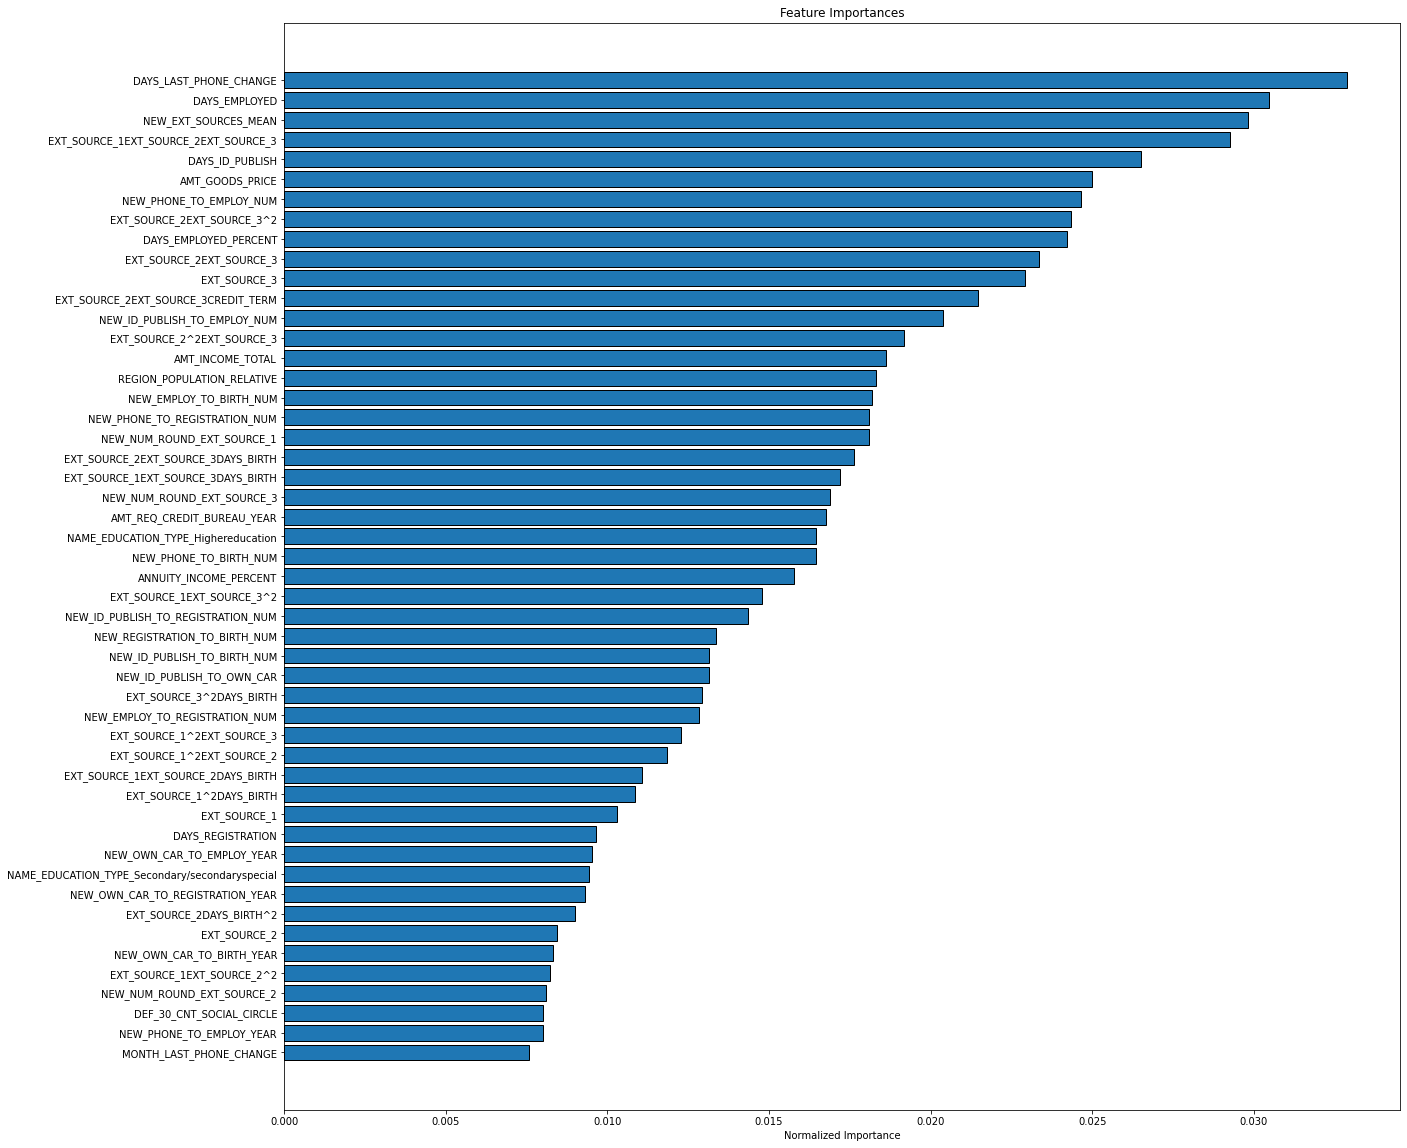

In [182]:
fi_2nd_sorted = plot_feature_importances(fi_2nd)

In [ ]:
nonZero=fi_2nd_sorted['feature'].count()-fi_2nd_sorted.loc[fi_2nd_sorted['importance_normalized']==0,'feature'].count()
metrics_dict={}
loop_from =131
loop_to = 91
for n in range(nonZero-loop_from,nonZero-loop_to):
  feats=list(fi_2nd_sorted['feature'].iloc[0:n:1])
  feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
  feats.append('SK_ID_CURR')
  feats_test = feats.copy()
  feats.append('TARGET')  
  revo_train=app_train_domain.loc[app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==1,feats].reset_index(drop=True)
  revo_test=app_test_domain.loc[app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==1,feats_test].reset_index(drop=True)
  submission_2nd_n, fi_2nd_n, metrics_2nd_n = model(revo_train, revo_test)
#  submission_n.to_csv('/content/drive/MyDrive/submission'+str(n)+'.csv', index = False)
  submission_2nd_n.to_csv('submission_2nd_'+str(n)+'.csv', index = False)
  metrics_dict[n]=metrics_2nd_n.iloc[5,2]
result=pd.DataFrame.from_dict(metrics_dict,orient='index')

In [197]:
print(result)

           0
8   0.718599
9   0.720420
10  0.732478
11  0.734700
12  0.734437
13  0.732970
14  0.728105
15  0.732858
16  0.731862
17  0.730605
18  0.731175
19  0.734213
20  0.733767
21  0.735644
22  0.741031
23  0.728133
24  0.744061
25  0.744175
26  0.744437
27  0.735809
28  0.743749
29  0.734155
30  0.732860
31  0.745666
32  0.732757
33  0.730795
34  0.744425
35  0.746036
36  0.734766
37  0.735143
38  0.733023
39  0.733590
40  0.733407
41  0.734224
42  0.735439
43  0.743419
44  0.740757
45  0.733055
46  0.743809
47  0.746437


8   0.718599

9   0.720420

10  0.732478

11  0.734700

12  0.734437

13  0.732970

14  0.728105

15  0.732858

16  0.731862

17  0.730605

18  0.731175

19  0.734213

20  0.733767

21  0.735644

22  0.741031

23  0.728133

24  0.744061

25  0.744175

26  0.744437

27  0.735809

28  0.743749

29  0.734155

30  0.732860

31  0.745666

32  0.732757

33  0.730795

34  0.744425

35  0.746036 〇

36  0.734766

37  0.735143

38  0.733023

39  0.733590

40  0.733407

41  0.734224

42  0.735439

43  0.743419

44  0.740757

45  0.733055

46  0.743809

47  0.746437

48  0.732705

49  0.741783

50  0.741060

51  0.732533

52  0.732178

53  0.741308

54  0.733538

55  0.740938

56  0.744332

57  0.732690

58  0.728445

59  0.743225

60  0.732828

61  0.732262

62  0.742241

63  0.734101

64  0.733825

65  0.732940

66  0.743951

67  0.727522

68  0.731830

69  0.742402

70  0.729870

71  0.729400

72  0.732178

73  0.733725

74  0.734411

75  0.742463

76  0.733069

77  0.733480

78  0.731923

79  0.732999

80  0.729459

81  0.732809

82  0.733225

83  0.732004

84  0.731016

85  0.735809

86  0.729636

87  0.735552

88   0.735583

89   0.733502

90   0.731446

91   0.731058

92   0.732083

93   0.732947

94   0.731889

95   0.733629

96   0.732708

97   0.733546

98   0.732416

99   0.733766

100  0.733880

101  0.735065

102  0.733079

103  0.732319

104  0.733750

105  0.732590

106  0.735086

107  0.733111

108  0.733482

109  0.734988

110  0.732817

111  0.732727

112  0.732303

113  0.735208

114  0.733909

115  0.731276

116  0.733535

117  0.734309

118  0.736479

119  0.730632

120  0.733483

121  0.734218

122  0.734842

123  0.734710

124  0.733504

125  0.735024

126  0.735037

127  0.732611

128  0.733240

129  0.733850

130  0.732859

131  0.732703

132  0.733259

133  0.733308

134  0.740923

135  0.731336

136  0.734097

137  0.733136

138  0.732003

# Cash Loan のみ

In [180]:
feats=list(fi_sorted['feature'])
feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
feats.append('SK_ID_CURR')
feats_test = feats.copy()
feats.append('TARGET')
feats.remove('NAME_CONTRACT_TYPE_Revolvingloans')
feats.remove('NAME_CONTRACT_TYPE_Cashloans')
non_revo_train=app_train_domain.loc[app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0,feats].reset_index(drop=True)
non_revo_test=app_test_domain.loc[app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0,feats_test].reset_index(drop=True)
submission_3rd, fi_3rd, metrics_3rd = model(non_revo_train, non_revo_test)


Training Data Shape:  (154988, 289)
Testing Data Shape:  (55794, 289)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.758023	train's binary_logloss: 0.588873	valid's auc: 0.746131	valid's binary_logloss: 0.589757
[400]	train's auc: 0.773984	train's binary_logloss: 0.571376	valid's auc: 0.754094	valid's binary_logloss: 0.576655
[600]	train's auc: 0.785139	train's binary_logloss: 0.559971	valid's auc: 0.756939	valid's binary_logloss: 0.568824
Early stopping, best iteration is:
[580]	train's auc: 0.784149	train's binary_logloss: 0.560956	valid's auc: 0.756794	valid's binary_logloss: 0.568372


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.75984	train's binary_logloss: 0.587306	valid's auc: 0.74158	valid's binary_logloss: 0.590662
[400]	train's auc: 0.775364	train's binary_logloss: 0.569568	valid's auc: 0.748808	valid's binary_logloss: 0.576077
[600]	train's auc: 0.785462	train's binary_logloss: 0.559056	valid's auc: 0.75163	valid's binary_logloss: 0.567646
[800]	train's auc: 0.793834	train's binary_logloss: 0.550465	valid's auc: 0.752915	valid's binary_logloss: 0.563058
[1000]	train's auc: 0.801974	train's binary_logloss: 0.542093	valid's auc: 0.754081	valid's binary_logloss: 0.557449
[1200]	train's auc: 0.808927	train's binary_logloss: 0.535043	valid's auc: 0.754145	valid's binary_logloss: 0.555294
Early stopping, best iteration is:
[1100]	train's auc: 0.805539	train's binary_logloss: 0.538462	valid's auc: 0.754318	valid's binary_logloss: 0.55586


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757108	train's binary_logloss: 0.589634	valid's auc: 0.750331	valid's binary_logloss: 0.588463
[400]	train's auc: 0.772845	train's binary_logloss: 0.572491	valid's auc: 0.75785	valid's binary_logloss: 0.574113
[600]	train's auc: 0.783782	train's binary_logloss: 0.56137	valid's auc: 0.761089	valid's binary_logloss: 0.567282
[800]	train's auc: 0.792821	train's binary_logloss: 0.552459	valid's auc: 0.761721	valid's binary_logloss: 0.560571
[1000]	train's auc: 0.80077	train's binary_logloss: 0.544373	valid's auc: 0.762348	valid's binary_logloss: 0.555409
Early stopping, best iteration is:
[934]	train's auc: 0.798144	train's binary_logloss: 0.54691	valid's auc: 0.762372	valid's binary_logloss: 0.55599


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.758119	train's binary_logloss: 0.588483	valid's auc: 0.745473	valid's binary_logloss: 0.59266
[400]	train's auc: 0.774694	train's binary_logloss: 0.570597	valid's auc: 0.752792	valid's binary_logloss: 0.579066
[600]	train's auc: 0.78588	train's binary_logloss: 0.559134	valid's auc: 0.755778	valid's binary_logloss: 0.572919
[800]	train's auc: 0.79492	train's binary_logloss: 0.549824	valid's auc: 0.756487	valid's binary_logloss: 0.566185
Early stopping, best iteration is:
[789]	train's auc: 0.794486	train's binary_logloss: 0.550286	valid's auc: 0.756705	valid's binary_logloss: 0.566434


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759142	train's binary_logloss: 0.588063	valid's auc: 0.74305	valid's binary_logloss: 0.590528
[400]	train's auc: 0.775103	train's binary_logloss: 0.570259	valid's auc: 0.750086	valid's binary_logloss: 0.579944
[600]	train's auc: 0.784719	train's binary_logloss: 0.560434	valid's auc: 0.751747	valid's binary_logloss: 0.57188
[800]	train's auc: 0.794546	train's binary_logloss: 0.550584	valid's auc: 0.753732	valid's binary_logloss: 0.565323
Early stopping, best iteration is:
[760]	train's auc: 0.792836	train's binary_logloss: 0.552275	valid's auc: 0.753586	valid's binary_logloss: 0.564539


In [181]:
metrics_3rd

,fold,train,valid
0,0,0.784149,0.756794
1,1,0.805539,0.754318
2,2,0.798144,0.762372
3,3,0.794486,0.756705
4,4,0.792836,0.753586
5,overall,0.795031,0.756694


5	overall	0.795031	0.756694

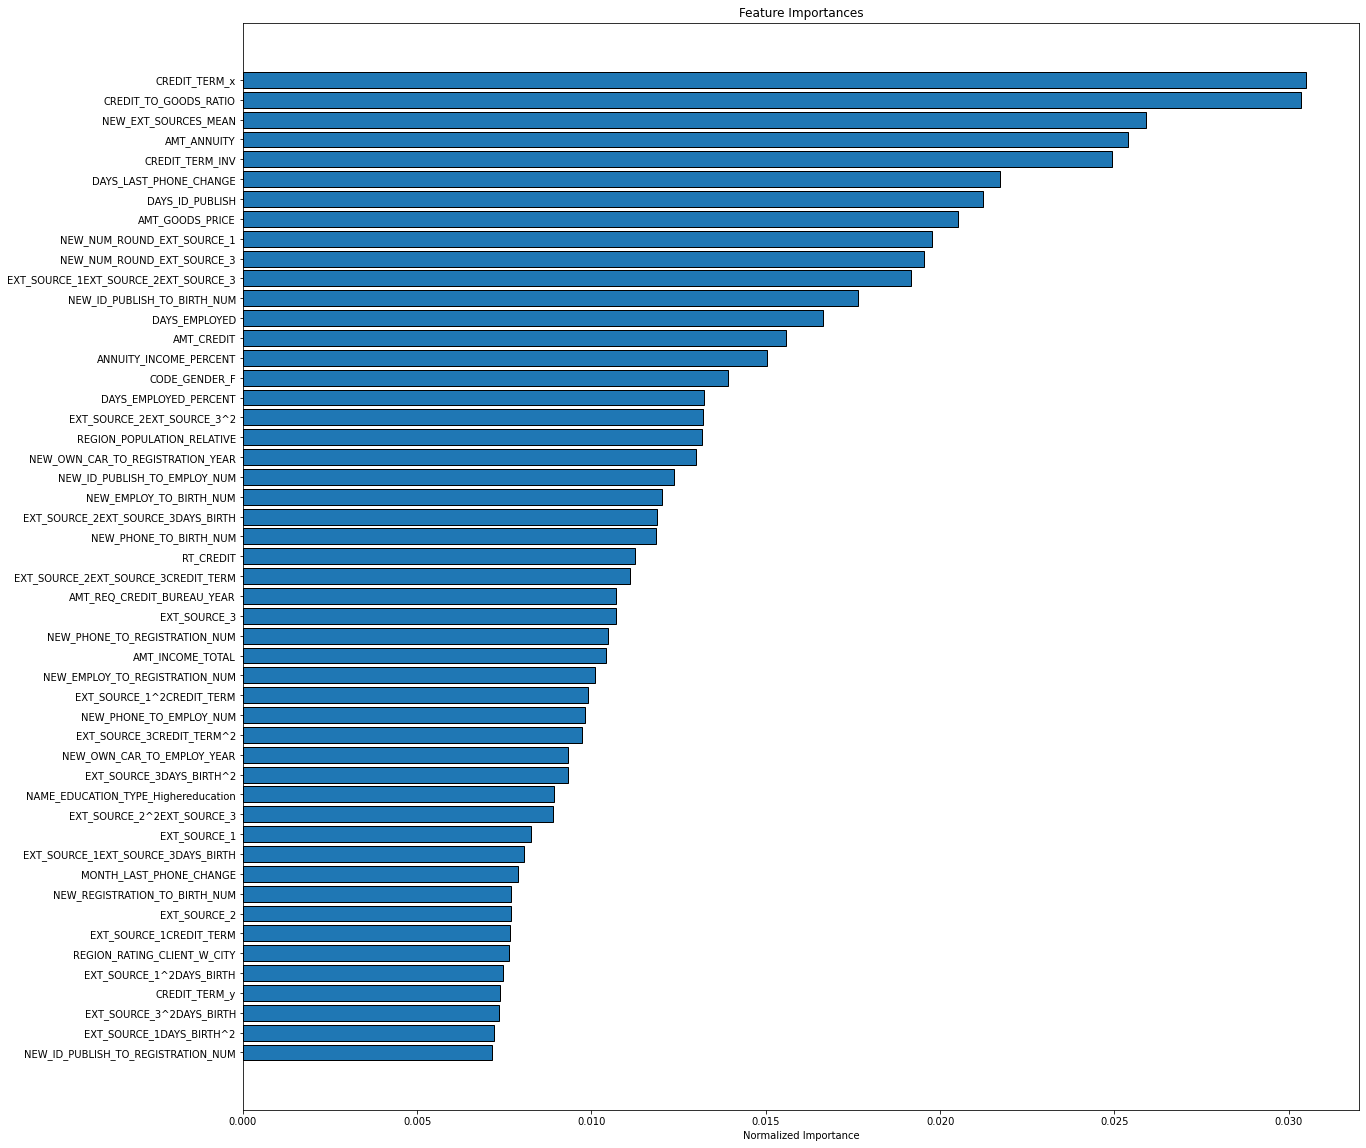

In [183]:
fi_3rd_sorted = plot_feature_importances(fi_3rd)

In [218]:
nonZero=fi_3rd_sorted['feature'].count()-fi_3rd_sorted.loc[fi_3rd_sorted['importance_normalized']==0,'feature'].count()
metrics_dict={}
loop_from =10
loop_to = 1
for n in range(nonZero-loop_from,nonZero-loop_to):
  feats=list(fi_3rd_sorted['feature'].iloc[0:n:1])
  feats = list(map(lambda x: str(x).replace(u' ', u''),feats))
  feats.append('SK_ID_CURR')
  feats_test = feats.copy()
  feats.append('TARGET')  
  revo_train=app_train_domain.loc[app_train_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0,feats].reset_index(drop=True)
  revo_test=app_test_domain.loc[app_test_domain['NAME_CONTRACT_TYPE_Revolvingloans']==0,feats_test].reset_index(drop=True)
  submission_3rd_n, fi_3rd_n, metrics_3rd_n = model(revo_train, revo_test)
#  submission_n.to_csv('/content/drive/MyDrive/submission'+str(n)+'.csv', index = False)
  submission_3rd_n.to_csv('submission_3rd_'+str(n)+'.csv', index = False)
  metrics_dict[n]=metrics_3rd_n.iloc[5,2]
result=pd.DataFrame.from_dict(metrics_dict,orient='index')

Training Data Shape:  (154988, 197)
Testing Data Shape:  (55794, 197)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.758005	train's binary_logloss: 0.588884	valid's auc: 0.745754	valid's binary_logloss: 0.589925
[400]	train's auc: 0.77418	train's binary_logloss: 0.571315	valid's auc: 0.753804	valid's binary_logloss: 0.576881
[600]	train's auc: 0.785311	train's binary_logloss: 0.559887	valid's auc: 0.756878	valid's binary_logloss: 0.568984
Early stopping, best iteration is:
[580]	train's auc: 0.784278	train's binary_logloss: 0.560891	valid's auc: 0.756668	valid's binary_logloss: 0.56856


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759757	train's binary_logloss: 0.587352	valid's auc: 0.741934	valid's binary_logloss: 0.590738
[400]	train's auc: 0.775179	train's binary_logloss: 0.569678	valid's auc: 0.749111	valid's binary_logloss: 0.576265
[600]	train's auc: 0.785372	train's binary_logloss: 0.559136	valid's auc: 0.751902	valid's binary_logloss: 0.56782
[800]	train's auc: 0.793814	train's binary_logloss: 0.550488	valid's auc: 0.753108	valid's binary_logloss: 0.563121
[1000]	train's auc: 0.801839	train's binary_logloss: 0.542262	valid's auc: 0.754396	valid's binary_logloss: 0.557674
Early stopping, best iteration is:
[995]	train's auc: 0.801683	train's binary_logloss: 0.542459	valid's auc: 0.754441	valid's binary_logloss: 0.557531


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757138	train's binary_logloss: 0.58967	valid's auc: 0.750487	valid's binary_logloss: 0.588626
[400]	train's auc: 0.772725	train's binary_logloss: 0.57253	valid's auc: 0.758087	valid's binary_logloss: 0.574226
[600]	train's auc: 0.783427	train's binary_logloss: 0.561615	valid's auc: 0.761061	valid's binary_logloss: 0.567583
[800]	train's auc: 0.792206	train's binary_logloss: 0.552909	valid's auc: 0.761786	valid's binary_logloss: 0.560908
[1000]	train's auc: 0.800209	train's binary_logloss: 0.544771	valid's auc: 0.762461	valid's binary_logloss: 0.555699
Early stopping, best iteration is:
[944]	train's auc: 0.79795	train's binary_logloss: 0.546957	valid's auc: 0.762491	valid's binary_logloss: 0.556417


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.758016	train's binary_logloss: 0.588551	valid's auc: 0.745646	valid's binary_logloss: 0.592774
[400]	train's auc: 0.774826	train's binary_logloss: 0.570475	valid's auc: 0.752945	valid's binary_logloss: 0.579118
[600]	train's auc: 0.785836	train's binary_logloss: 0.559178	valid's auc: 0.755436	valid's binary_logloss: 0.573292
Early stopping, best iteration is:
[560]	train's auc: 0.78395	train's binary_logloss: 0.561245	valid's auc: 0.75562	valid's binary_logloss: 0.574849


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759108	train's binary_logloss: 0.588062	valid's auc: 0.743359	valid's binary_logloss: 0.590539
[400]	train's auc: 0.77504	train's binary_logloss: 0.570347	valid's auc: 0.750255	valid's binary_logloss: 0.58
[600]	train's auc: 0.784535	train's binary_logloss: 0.560592	valid's auc: 0.752063	valid's binary_logloss: 0.571961
[800]	train's auc: 0.794326	train's binary_logloss: 0.550774	valid's auc: 0.753871	valid's binary_logloss: 0.565508
Early stopping, best iteration is:
[760]	train's auc: 0.792501	train's binary_logloss: 0.552556	valid's auc: 0.753721	valid's binary_logloss: 0.564809
Training Data Shape:  (154988, 198)
Testing Data Shape:  (55794, 198)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757932	train's binary_logloss: 0.588971	valid's auc: 0.745866	valid's binary_logloss: 0.590006
[400]	train's auc: 0.774188	train's binary_logloss: 0.571299	valid's auc: 0.753646	valid's binary_logloss: 0.57691
[600]	train's auc: 0.785395	train's binary_logloss: 0.559751	valid's auc: 0.75637	valid's binary_logloss: 0.56911
Early stopping, best iteration is:
[580]	train's auc: 0.784453	train's binary_logloss: 0.560715	valid's auc: 0.756185	valid's binary_logloss: 0.568656


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759758	train's binary_logloss: 0.58742	valid's auc: 0.74166	valid's binary_logloss: 0.590791
[400]	train's auc: 0.775301	train's binary_logloss: 0.569649	valid's auc: 0.748967	valid's binary_logloss: 0.576262
[600]	train's auc: 0.785664	train's binary_logloss: 0.558897	valid's auc: 0.751918	valid's binary_logloss: 0.567699
[800]	train's auc: 0.794106	train's binary_logloss: 0.550204	valid's auc: 0.753125	valid's binary_logloss: 0.562925
[1000]	train's auc: 0.802018	train's binary_logloss: 0.542101	valid's auc: 0.754657	valid's binary_logloss: 0.557459
Early stopping, best iteration is:
[1060]	train's auc: 0.803973	train's binary_logloss: 0.540085	valid's auc: 0.754827	valid's binary_logloss: 0.557084


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.75697	train's binary_logloss: 0.589739	valid's auc: 0.750632	valid's binary_logloss: 0.588658
[400]	train's auc: 0.772691	train's binary_logloss: 0.572497	valid's auc: 0.757894	valid's binary_logloss: 0.574243
[600]	train's auc: 0.783615	train's binary_logloss: 0.561438	valid's auc: 0.761354	valid's binary_logloss: 0.567529
[800]	train's auc: 0.792374	train's binary_logloss: 0.552753	valid's auc: 0.761929	valid's binary_logloss: 0.560832
[1000]	train's auc: 0.800336	train's binary_logloss: 0.544596	valid's auc: 0.762518	valid's binary_logloss: 0.555538
Early stopping, best iteration is:
[932]	train's auc: 0.797555	train's binary_logloss: 0.547312	valid's auc: 0.762608	valid's binary_logloss: 0.55604


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.758061	train's binary_logloss: 0.588476	valid's auc: 0.745041	valid's binary_logloss: 0.592759
[400]	train's auc: 0.774921	train's binary_logloss: 0.570337	valid's auc: 0.75282	valid's binary_logloss: 0.579062
[600]	train's auc: 0.786104	train's binary_logloss: 0.558917	valid's auc: 0.755383	valid's binary_logloss: 0.572945
[800]	train's auc: 0.794965	train's binary_logloss: 0.549736	valid's auc: 0.756529	valid's binary_logloss: 0.566133
Early stopping, best iteration is:
[789]	train's auc: 0.794494	train's binary_logloss: 0.550238	valid's auc: 0.756724	valid's binary_logloss: 0.566476


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759081	train's binary_logloss: 0.588149	valid's auc: 0.743197	valid's binary_logloss: 0.590631
[400]	train's auc: 0.775292	train's binary_logloss: 0.570211	valid's auc: 0.750662	valid's binary_logloss: 0.579792
[600]	train's auc: 0.784726	train's binary_logloss: 0.56052	valid's auc: 0.752315	valid's binary_logloss: 0.571796
[800]	train's auc: 0.794357	train's binary_logloss: 0.5508	valid's auc: 0.754231	valid's binary_logloss: 0.565325
Early stopping, best iteration is:
[760]	train's auc: 0.792605	train's binary_logloss: 0.552531	valid's auc: 0.753996	valid's binary_logloss: 0.564649
Training Data Shape:  (154988, 199)
Testing Data Shape:  (55794, 199)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757805	train's binary_logloss: 0.589026	valid's auc: 0.745881	valid's binary_logloss: 0.589942
[400]	train's auc: 0.773883	train's binary_logloss: 0.571504	valid's auc: 0.753875	valid's binary_logloss: 0.576904
[600]	train's auc: 0.785084	train's binary_logloss: 0.559999	valid's auc: 0.756826	valid's binary_logloss: 0.569074
[800]	train's auc: 0.794085	train's binary_logloss: 0.550821	valid's auc: 0.757897	valid's binary_logloss: 0.563273
[1000]	train's auc: 0.801883	train's binary_logloss: 0.542565	valid's auc: 0.758329	valid's binary_logloss: 0.560182
Early stopping, best iteration is:
[990]	train's auc: 0.801749	train's binary_logloss: 0.542837	valid's auc: 0.758547	valid's binary_logloss: 0.560578


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759572	train's binary_logloss: 0.587454	valid's auc: 0.741627	valid's binary_logloss: 0.590787
[400]	train's auc: 0.77524	train's binary_logloss: 0.569687	valid's auc: 0.748821	valid's binary_logloss: 0.576236
[600]	train's auc: 0.785742	train's binary_logloss: 0.558871	valid's auc: 0.752129	valid's binary_logloss: 0.567477
[800]	train's auc: 0.794016	train's binary_logloss: 0.550329	valid's auc: 0.752863	valid's binary_logloss: 0.563079
[1000]	train's auc: 0.801861	train's binary_logloss: 0.542197	valid's auc: 0.754267	valid's binary_logloss: 0.557504
[1200]	train's auc: 0.808738	train's binary_logloss: 0.535237	valid's auc: 0.754315	valid's binary_logloss: 0.555488
Early stopping, best iteration is:
[1111]	train's auc: 0.805667	train's binary_logloss: 0.538364	valid's auc: 0.754496	valid's binary_logloss: 0.556445


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757101	train's binary_logloss: 0.589628	valid's auc: 0.750492	valid's binary_logloss: 0.58854
[400]	train's auc: 0.772878	train's binary_logloss: 0.572326	valid's auc: 0.757817	valid's binary_logloss: 0.57412
[600]	train's auc: 0.783784	train's binary_logloss: 0.561281	valid's auc: 0.761072	valid's binary_logloss: 0.567439
[800]	train's auc: 0.792622	train's binary_logloss: 0.552494	valid's auc: 0.76161	valid's binary_logloss: 0.560744
[1000]	train's auc: 0.800621	train's binary_logloss: 0.544349	valid's auc: 0.762344	valid's binary_logloss: 0.555579
Early stopping, best iteration is:
[932]	train's auc: 0.797794	train's binary_logloss: 0.547077	valid's auc: 0.762431	valid's binary_logloss: 0.555967


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.758133	train's binary_logloss: 0.588451	valid's auc: 0.745404	valid's binary_logloss: 0.59266
[400]	train's auc: 0.774982	train's binary_logloss: 0.570383	valid's auc: 0.752744	valid's binary_logloss: 0.579021
[600]	train's auc: 0.786227	train's binary_logloss: 0.558897	valid's auc: 0.755565	valid's binary_logloss: 0.572829
[800]	train's auc: 0.795155	train's binary_logloss: 0.549611	valid's auc: 0.756311	valid's binary_logloss: 0.566151
Early stopping, best iteration is:
[788]	train's auc: 0.794692	train's binary_logloss: 0.550136	valid's auc: 0.756621	valid's binary_logloss: 0.566489


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759096	train's binary_logloss: 0.588127	valid's auc: 0.743051	valid's binary_logloss: 0.590646
[400]	train's auc: 0.775268	train's binary_logloss: 0.570175	valid's auc: 0.750462	valid's binary_logloss: 0.579843
[600]	train's auc: 0.784733	train's binary_logloss: 0.560447	valid's auc: 0.752158	valid's binary_logloss: 0.571798
[800]	train's auc: 0.794582	train's binary_logloss: 0.55067	valid's auc: 0.754069	valid's binary_logloss: 0.565445
Early stopping, best iteration is:
[760]	train's auc: 0.792715	train's binary_logloss: 0.552455	valid's auc: 0.753806	valid's binary_logloss: 0.564688
Training Data Shape:  (154988, 200)
Testing Data Shape:  (55794, 200)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757989	train's binary_logloss: 0.588907	valid's auc: 0.746113	valid's binary_logloss: 0.589908
[400]	train's auc: 0.774049	train's binary_logloss: 0.57138	valid's auc: 0.753821	valid's binary_logloss: 0.576977
[600]	train's auc: 0.785219	train's binary_logloss: 0.559925	valid's auc: 0.756821	valid's binary_logloss: 0.568927
Early stopping, best iteration is:
[580]	train's auc: 0.784235	train's binary_logloss: 0.560886	valid's auc: 0.756619	valid's binary_logloss: 0.568475


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759716	train's binary_logloss: 0.587423	valid's auc: 0.741572	valid's binary_logloss: 0.590976
[400]	train's auc: 0.775247	train's binary_logloss: 0.569721	valid's auc: 0.748559	valid's binary_logloss: 0.576529
[600]	train's auc: 0.785347	train's binary_logloss: 0.559209	valid's auc: 0.751039	valid's binary_logloss: 0.568206
[800]	train's auc: 0.793804	train's binary_logloss: 0.550464	valid's auc: 0.752236	valid's binary_logloss: 0.563299
[1000]	train's auc: 0.801617	train's binary_logloss: 0.542387	valid's auc: 0.753461	valid's binary_logloss: 0.557891
Early stopping, best iteration is:
[950]	train's auc: 0.799899	train's binary_logloss: 0.544357	valid's auc: 0.753669	valid's binary_logloss: 0.560184


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757253	train's binary_logloss: 0.589563	valid's auc: 0.750614	valid's binary_logloss: 0.588401
[400]	train's auc: 0.773087	train's binary_logloss: 0.572248	valid's auc: 0.758142	valid's binary_logloss: 0.573839
[600]	train's auc: 0.78406	train's binary_logloss: 0.561062	valid's auc: 0.761228	valid's binary_logloss: 0.567151
[800]	train's auc: 0.792868	train's binary_logloss: 0.552306	valid's auc: 0.761715	valid's binary_logloss: 0.560555
Early stopping, best iteration is:
[720]	train's auc: 0.78932	train's binary_logloss: 0.55572	valid's auc: 0.761808	valid's binary_logloss: 0.563351


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.758035	train's binary_logloss: 0.588537	valid's auc: 0.745299	valid's binary_logloss: 0.592816
[400]	train's auc: 0.774824	train's binary_logloss: 0.57045	valid's auc: 0.752662	valid's binary_logloss: 0.579306
[600]	train's auc: 0.786039	train's binary_logloss: 0.558967	valid's auc: 0.755052	valid's binary_logloss: 0.573366
Early stopping, best iteration is:
[560]	train's auc: 0.784265	train's binary_logloss: 0.560992	valid's auc: 0.755366	valid's binary_logloss: 0.574878


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.75895	train's binary_logloss: 0.588292	valid's auc: 0.74296	valid's binary_logloss: 0.59073
[400]	train's auc: 0.775144	train's binary_logloss: 0.570294	valid's auc: 0.750327	valid's binary_logloss: 0.579843
[600]	train's auc: 0.784597	train's binary_logloss: 0.560501	valid's auc: 0.751993	valid's binary_logloss: 0.571696
[800]	train's auc: 0.794586	train's binary_logloss: 0.550537	valid's auc: 0.754134	valid's binary_logloss: 0.564971
Early stopping, best iteration is:
[760]	train's auc: 0.79269	train's binary_logloss: 0.552353	valid's auc: 0.7538	valid's binary_logloss: 0.564357
Training Data Shape:  (154988, 201)
Testing Data Shape:  (55794, 201)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.75799	train's binary_logloss: 0.588887	valid's auc: 0.746308	valid's binary_logloss: 0.589793
[400]	train's auc: 0.774132	train's binary_logloss: 0.571316	valid's auc: 0.754373	valid's binary_logloss: 0.57658
[600]	train's auc: 0.785339	train's binary_logloss: 0.559841	valid's auc: 0.757067	valid's binary_logloss: 0.56866
Early stopping, best iteration is:
[580]	train's auc: 0.784335	train's binary_logloss: 0.560842	valid's auc: 0.756872	valid's binary_logloss: 0.568216


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759683	train's binary_logloss: 0.587454	valid's auc: 0.741521	valid's binary_logloss: 0.590861
[400]	train's auc: 0.775126	train's binary_logloss: 0.569797	valid's auc: 0.748495	valid's binary_logloss: 0.576467
[600]	train's auc: 0.785291	train's binary_logloss: 0.559274	valid's auc: 0.75112	valid's binary_logloss: 0.568042
[800]	train's auc: 0.793808	train's binary_logloss: 0.550539	valid's auc: 0.752163	valid's binary_logloss: 0.563459
[1000]	train's auc: 0.801898	train's binary_logloss: 0.542242	valid's auc: 0.753213	valid's binary_logloss: 0.557945
Early stopping, best iteration is:
[1052]	train's auc: 0.803717	train's binary_logloss: 0.540415	valid's auc: 0.753311	valid's binary_logloss: 0.558238


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757035	train's binary_logloss: 0.589699	valid's auc: 0.750709	valid's binary_logloss: 0.588531
[400]	train's auc: 0.772765	train's binary_logloss: 0.572506	valid's auc: 0.758241	valid's binary_logloss: 0.573955
[600]	train's auc: 0.783603	train's binary_logloss: 0.561517	valid's auc: 0.761341	valid's binary_logloss: 0.567441
[800]	train's auc: 0.792234	train's binary_logloss: 0.552913	valid's auc: 0.761931	valid's binary_logloss: 0.560861
Early stopping, best iteration is:
[780]	train's auc: 0.791572	train's binary_logloss: 0.553716	valid's auc: 0.761959	valid's binary_logloss: 0.561348


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.75809	train's binary_logloss: 0.588472	valid's auc: 0.745378	valid's binary_logloss: 0.592697
[400]	train's auc: 0.774622	train's binary_logloss: 0.570613	valid's auc: 0.752591	valid's binary_logloss: 0.579366
[600]	train's auc: 0.785891	train's binary_logloss: 0.5591	valid's auc: 0.755278	valid's binary_logloss: 0.573269
[800]	train's auc: 0.794785	train's binary_logloss: 0.549879	valid's auc: 0.755985	valid's binary_logloss: 0.566541
Early stopping, best iteration is:
[781]	train's auc: 0.794113	train's binary_logloss: 0.55072	valid's auc: 0.756155	valid's binary_logloss: 0.567583


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759165	train's binary_logloss: 0.588064	valid's auc: 0.743282	valid's binary_logloss: 0.590357
[400]	train's auc: 0.775248	train's binary_logloss: 0.570169	valid's auc: 0.750381	valid's binary_logloss: 0.579759
[600]	train's auc: 0.784596	train's binary_logloss: 0.560556	valid's auc: 0.75217	valid's binary_logloss: 0.571844
[800]	train's auc: 0.794527	train's binary_logloss: 0.550592	valid's auc: 0.754103	valid's binary_logloss: 0.565225
Early stopping, best iteration is:
[760]	train's auc: 0.792689	train's binary_logloss: 0.55236	valid's auc: 0.753905	valid's binary_logloss: 0.564516
Training Data Shape:  (154988, 202)
Testing Data Shape:  (55794, 202)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757855	train's binary_logloss: 0.58895	valid's auc: 0.745462	valid's binary_logloss: 0.589921
[400]	train's auc: 0.77392	train's binary_logloss: 0.571507	valid's auc: 0.753473	valid's binary_logloss: 0.576906
[600]	train's auc: 0.785129	train's binary_logloss: 0.560094	valid's auc: 0.756598	valid's binary_logloss: 0.568989
[800]	train's auc: 0.794113	train's binary_logloss: 0.55092	valid's auc: 0.757824	valid's binary_logloss: 0.563117
[1000]	train's auc: 0.801923	train's binary_logloss: 0.542596	valid's auc: 0.758143	valid's binary_logloss: 0.560218
Early stopping, best iteration is:
[990]	train's auc: 0.801699	train's binary_logloss: 0.54292	valid's auc: 0.758377	valid's binary_logloss: 0.560567


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759791	train's binary_logloss: 0.587354	valid's auc: 0.741763	valid's binary_logloss: 0.590825
[400]	train's auc: 0.775163	train's binary_logloss: 0.569757	valid's auc: 0.748944	valid's binary_logloss: 0.5763
[600]	train's auc: 0.785306	train's binary_logloss: 0.55917	valid's auc: 0.752047	valid's binary_logloss: 0.567742
[800]	train's auc: 0.793613	train's binary_logloss: 0.550552	valid's auc: 0.753117	valid's binary_logloss: 0.563211
[1000]	train's auc: 0.801767	train's binary_logloss: 0.542301	valid's auc: 0.75465	valid's binary_logloss: 0.557612
Early stopping, best iteration is:
[1060]	train's auc: 0.803756	train's binary_logloss: 0.54026	valid's auc: 0.75486	valid's binary_logloss: 0.557328


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757	train's binary_logloss: 0.589758	valid's auc: 0.750414	valid's binary_logloss: 0.588519
[400]	train's auc: 0.772663	train's binary_logloss: 0.572555	valid's auc: 0.758022	valid's binary_logloss: 0.57425
[600]	train's auc: 0.783554	train's binary_logloss: 0.561504	valid's auc: 0.761085	valid's binary_logloss: 0.567571
[800]	train's auc: 0.792495	train's binary_logloss: 0.55268	valid's auc: 0.761841	valid's binary_logloss: 0.560863
[1000]	train's auc: 0.800469	train's binary_logloss: 0.544545	valid's auc: 0.762557	valid's binary_logloss: 0.555567
[1200]	train's auc: 0.807418	train's binary_logloss: 0.537405	valid's auc: 0.761952	valid's binary_logloss: 0.551979
Early stopping, best iteration is:
[1119]	train's auc: 0.804721	train's binary_logloss: 0.540073	valid's auc: 0.762637	valid's binary_logloss: 0.552723


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.758056	train's binary_logloss: 0.588486	valid's auc: 0.745491	valid's binary_logloss: 0.592609
[400]	train's auc: 0.774763	train's binary_logloss: 0.570521	valid's auc: 0.752898	valid's binary_logloss: 0.578982
[600]	train's auc: 0.785869	train's binary_logloss: 0.559141	valid's auc: 0.755534	valid's binary_logloss: 0.573054
Early stopping, best iteration is:
[561]	train's auc: 0.784096	train's binary_logloss: 0.561136	valid's auc: 0.755671	valid's binary_logloss: 0.574568


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759117	train's binary_logloss: 0.588117	valid's auc: 0.743018	valid's binary_logloss: 0.590593
[400]	train's auc: 0.77517	train's binary_logloss: 0.570271	valid's auc: 0.750079	valid's binary_logloss: 0.579922
[600]	train's auc: 0.784644	train's binary_logloss: 0.560533	valid's auc: 0.751939	valid's binary_logloss: 0.571785
[800]	train's auc: 0.794389	train's binary_logloss: 0.550839	valid's auc: 0.753608	valid's binary_logloss: 0.565377
Early stopping, best iteration is:
[760]	train's auc: 0.792519	train's binary_logloss: 0.552593	valid's auc: 0.753402	valid's binary_logloss: 0.564577
Training Data Shape:  (154988, 203)
Testing Data Shape:  (55794, 203)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757755	train's binary_logloss: 0.589035	valid's auc: 0.745968	valid's binary_logloss: 0.589903
[400]	train's auc: 0.77384	train's binary_logloss: 0.571483	valid's auc: 0.75376	valid's binary_logloss: 0.576862
[600]	train's auc: 0.785111	train's binary_logloss: 0.560042	valid's auc: 0.756893	valid's binary_logloss: 0.568772
Early stopping, best iteration is:
[580]	train's auc: 0.7842	train's binary_logloss: 0.560939	valid's auc: 0.75671	valid's binary_logloss: 0.568292


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.7598	train's binary_logloss: 0.587349	valid's auc: 0.741486	valid's binary_logloss: 0.590981
[400]	train's auc: 0.775122	train's binary_logloss: 0.569806	valid's auc: 0.748396	valid's binary_logloss: 0.576456
[600]	train's auc: 0.785255	train's binary_logloss: 0.559229	valid's auc: 0.751209	valid's binary_logloss: 0.568186
[800]	train's auc: 0.793635	train's binary_logloss: 0.550606	valid's auc: 0.752545	valid's binary_logloss: 0.563454
[1000]	train's auc: 0.801679	train's binary_logloss: 0.5424	valid's auc: 0.753988	valid's binary_logloss: 0.557998
Early stopping, best iteration is:
[1051]	train's auc: 0.803471	train's binary_logloss: 0.540582	valid's auc: 0.754036	valid's binary_logloss: 0.558299


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757183	train's binary_logloss: 0.589617	valid's auc: 0.750342	valid's binary_logloss: 0.588679
[400]	train's auc: 0.772817	train's binary_logloss: 0.572546	valid's auc: 0.758181	valid's binary_logloss: 0.574252
[600]	train's auc: 0.783895	train's binary_logloss: 0.561271	valid's auc: 0.761042	valid's binary_logloss: 0.56748
[800]	train's auc: 0.79269	train's binary_logloss: 0.552564	valid's auc: 0.76154	valid's binary_logloss: 0.560902
Early stopping, best iteration is:
[721]	train's auc: 0.789309	train's binary_logloss: 0.555873	valid's auc: 0.761704	valid's binary_logloss: 0.563497


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757891	train's binary_logloss: 0.58863	valid's auc: 0.745413	valid's binary_logloss: 0.592802
[400]	train's auc: 0.774788	train's binary_logloss: 0.570518	valid's auc: 0.752803	valid's binary_logloss: 0.579351
[600]	train's auc: 0.786034	train's binary_logloss: 0.558984	valid's auc: 0.755288	valid's binary_logloss: 0.573357
Early stopping, best iteration is:
[568]	train's auc: 0.784521	train's binary_logloss: 0.560615	valid's auc: 0.755411	valid's binary_logloss: 0.574113


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759244	train's binary_logloss: 0.588019	valid's auc: 0.743721	valid's binary_logloss: 0.590418
[400]	train's auc: 0.775275	train's binary_logloss: 0.570215	valid's auc: 0.750609	valid's binary_logloss: 0.579883
[600]	train's auc: 0.784614	train's binary_logloss: 0.560559	valid's auc: 0.752314	valid's binary_logloss: 0.571922
[800]	train's auc: 0.79448	train's binary_logloss: 0.550687	valid's auc: 0.75426	valid's binary_logloss: 0.565383
Early stopping, best iteration is:
[760]	train's auc: 0.792623	train's binary_logloss: 0.552521	valid's auc: 0.753984	valid's binary_logloss: 0.564704
Training Data Shape:  (154988, 204)
Testing Data Shape:  (55794, 204)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757806	train's binary_logloss: 0.588997	valid's auc: 0.74577	valid's binary_logloss: 0.590031
[400]	train's auc: 0.773906	train's binary_logloss: 0.57151	valid's auc: 0.75352	valid's binary_logloss: 0.576928
[600]	train's auc: 0.785021	train's binary_logloss: 0.560112	valid's auc: 0.756577	valid's binary_logloss: 0.568988
Early stopping, best iteration is:
[580]	train's auc: 0.784122	train's binary_logloss: 0.561008	valid's auc: 0.756419	valid's binary_logloss: 0.56849


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759691	train's binary_logloss: 0.587353	valid's auc: 0.7414	valid's binary_logloss: 0.590867
[400]	train's auc: 0.775229	train's binary_logloss: 0.569701	valid's auc: 0.748406	valid's binary_logloss: 0.57646
[600]	train's auc: 0.785419	train's binary_logloss: 0.559116	valid's auc: 0.751398	valid's binary_logloss: 0.567954
[800]	train's auc: 0.793902	train's binary_logloss: 0.550461	valid's auc: 0.752632	valid's binary_logloss: 0.563187
[1000]	train's auc: 0.801901	train's binary_logloss: 0.542187	valid's auc: 0.754056	valid's binary_logloss: 0.557646
[1200]	train's auc: 0.808989	train's binary_logloss: 0.534996	valid's auc: 0.754118	valid's binary_logloss: 0.555438
Early stopping, best iteration is:
[1100]	train's auc: 0.805467	train's binary_logloss: 0.538538	valid's auc: 0.754414	valid's binary_logloss: 0.555991


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757045	train's binary_logloss: 0.589672	valid's auc: 0.75076	valid's binary_logloss: 0.588676
[400]	train's auc: 0.772709	train's binary_logloss: 0.572543	valid's auc: 0.758221	valid's binary_logloss: 0.57432
[600]	train's auc: 0.783477	train's binary_logloss: 0.561566	valid's auc: 0.761213	valid's binary_logloss: 0.567681
[800]	train's auc: 0.792404	train's binary_logloss: 0.552773	valid's auc: 0.761863	valid's binary_logloss: 0.560868
[1000]	train's auc: 0.800219	train's binary_logloss: 0.544751	valid's auc: 0.762532	valid's binary_logloss: 0.555795
Early stopping, best iteration is:
[1001]	train's auc: 0.800253	train's binary_logloss: 0.544704	valid's auc: 0.762536	valid's binary_logloss: 0.555759


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757884	train's binary_logloss: 0.588566	valid's auc: 0.745267	valid's binary_logloss: 0.592722
[400]	train's auc: 0.774531	train's binary_logloss: 0.570694	valid's auc: 0.752541	valid's binary_logloss: 0.579344
[600]	train's auc: 0.785889	train's binary_logloss: 0.559151	valid's auc: 0.755397	valid's binary_logloss: 0.573218
[800]	train's auc: 0.794727	train's binary_logloss: 0.549958	valid's auc: 0.756165	valid's binary_logloss: 0.566599
Early stopping, best iteration is:
[785]	train's auc: 0.794221	train's binary_logloss: 0.550603	valid's auc: 0.756467	valid's binary_logloss: 0.567219


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759052	train's binary_logloss: 0.588117	valid's auc: 0.743049	valid's binary_logloss: 0.590672
[400]	train's auc: 0.77505	train's binary_logloss: 0.570327	valid's auc: 0.750276	valid's binary_logloss: 0.580012
[600]	train's auc: 0.784522	train's binary_logloss: 0.560662	valid's auc: 0.75222	valid's binary_logloss: 0.571933
[800]	train's auc: 0.794388	train's binary_logloss: 0.550758	valid's auc: 0.754559	valid's binary_logloss: 0.56521
Early stopping, best iteration is:
[760]	train's auc: 0.792514	train's binary_logloss: 0.552571	valid's auc: 0.754174	valid's binary_logloss: 0.564588
Training Data Shape:  (154988, 205)
Testing Data Shape:  (55794, 205)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757828	train's binary_logloss: 0.588969	valid's auc: 0.745884	valid's binary_logloss: 0.589996
[400]	train's auc: 0.7739	train's binary_logloss: 0.571505	valid's auc: 0.753736	valid's binary_logloss: 0.577107
[600]	train's auc: 0.785077	train's binary_logloss: 0.559986	valid's auc: 0.756987	valid's binary_logloss: 0.568995
Early stopping, best iteration is:
[580]	train's auc: 0.784147	train's binary_logloss: 0.560973	valid's auc: 0.756799	valid's binary_logloss: 0.568493


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759914	train's binary_logloss: 0.587267	valid's auc: 0.741394	valid's binary_logloss: 0.590795
[400]	train's auc: 0.775373	train's binary_logloss: 0.56955	valid's auc: 0.748438	valid's binary_logloss: 0.576239
[600]	train's auc: 0.785582	train's binary_logloss: 0.559035	valid's auc: 0.751253	valid's binary_logloss: 0.567718
[800]	train's auc: 0.793902	train's binary_logloss: 0.550393	valid's auc: 0.75241	valid's binary_logloss: 0.563025
[1000]	train's auc: 0.801838	train's binary_logloss: 0.542224	valid's auc: 0.753462	valid's binary_logloss: 0.55767
[1200]	train's auc: 0.808771	train's binary_logloss: 0.535214	valid's auc: 0.753478	valid's binary_logloss: 0.555405
Early stopping, best iteration is:
[1109]	train's auc: 0.805509	train's binary_logloss: 0.538488	valid's auc: 0.753673	valid's binary_logloss: 0.556545


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.757008	train's binary_logloss: 0.589731	valid's auc: 0.750507	valid's binary_logloss: 0.588753
[400]	train's auc: 0.772648	train's binary_logloss: 0.572584	valid's auc: 0.758073	valid's binary_logloss: 0.574347
[600]	train's auc: 0.783548	train's binary_logloss: 0.561559	valid's auc: 0.760781	valid's binary_logloss: 0.56793
[800]	train's auc: 0.792477	train's binary_logloss: 0.552709	valid's auc: 0.761482	valid's binary_logloss: 0.561108
[1000]	train's auc: 0.800558	train's binary_logloss: 0.544473	valid's auc: 0.762084	valid's binary_logloss: 0.555889
Early stopping, best iteration is:
[934]	train's auc: 0.797887	train's binary_logloss: 0.547047	valid's auc: 0.76212	valid's binary_logloss: 0.556507


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.758245	train's binary_logloss: 0.588356	valid's auc: 0.74559	valid's binary_logloss: 0.592547
[400]	train's auc: 0.774749	train's binary_logloss: 0.570577	valid's auc: 0.752785	valid's binary_logloss: 0.579244
[600]	train's auc: 0.785919	train's binary_logloss: 0.559026	valid's auc: 0.755307	valid's binary_logloss: 0.573287
Early stopping, best iteration is:
[561]	train's auc: 0.78411	train's binary_logloss: 0.56108	valid's auc: 0.755621	valid's binary_logloss: 0.574776


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[200]	train's auc: 0.759199	train's binary_logloss: 0.588073	valid's auc: 0.743419	valid's binary_logloss: 0.590462
[400]	train's auc: 0.77528	train's binary_logloss: 0.570172	valid's auc: 0.750572	valid's binary_logloss: 0.579787
[600]	train's auc: 0.784553	train's binary_logloss: 0.560548	valid's auc: 0.752238	valid's binary_logloss: 0.571925
[800]	train's auc: 0.794684	train's binary_logloss: 0.550536	valid's auc: 0.754341	valid's binary_logloss: 0.565247
Early stopping, best iteration is:
[760]	train's auc: 0.792704	train's binary_logloss: 0.552379	valid's auc: 0.753963	valid's binary_logloss: 0.564601


In [219]:
print(result)

            0
197  0.756499
198  0.756827
199  0.757156
200  0.756187
201  0.756381
202  0.756915
203  0.756290
204  0.756747
205  0.756345


35  0.754061

45  0.754844

55  0.754712

65  0.754756

76  0.755654

85  0.755951

95  0.755952

115  0.755962

135  0.756375

197  0.756499

198  0.756827

199  0.757156

200  0.756187

201  0.756381

202  0.756915　〇

203  0.756290

204  0.756747

205  0.756345

206  0.756544

289  0.756694

In [220]:
best_2nd = pd.read_csv('submission_2nd_35.csv')
best_3rd = pd.read_csv('submission_3rd_202.csv')

In [223]:
best_submission=pd.concat([best_3rd,best_2nd],axis=0)

In [225]:
best_submission.sort_values(by='SK_ID_CURR',inplace=True)

In [227]:
best_submission.to_csv('best_submission.csv',index=False)